`Aim of this project:`
Segment the customers (Physicians) which helps the pharmaceutical company to target the group having the highest nRx to tRx ratio, eventually boosting up the drug sales.

In [1]:
# importing the necessary libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, sklearn

In [2]:
# loading the data
df = pd.read_csv('physician_prescriptions.csv')

# check
df

,physician_id,trx,nrx
0,55232,40,8
1,1173,37,6
2,28285,43,10
3,26262,42,9
4,76343,46,11
...,...,...,...
365,70334,42,8
366,57248,39,11
367,55229,39,6
368,47189,35,7


In [3]:
# storing all the physician Ids into a separate dataframe
phy_id = df['physician_id'].copy()

# check
phy_id

0      55232
1       1173
2      28285
3      26262
4      76343
       ...  
365    70334
366    57248
367    55229
368    47189
369    11220
Name: physician_id, Length: 370, dtype: object

In [4]:
#dropping the id column in df
df.drop('physician_id',axis=1,inplace=True)

# check
df

,trx,nrx
0,40,8
1,37,6
2,43,10
3,42,9
4,46,11
...,...,...
365,42,8
366,39,11
367,39,6
368,35,7


In [5]:
phy_id

0      55232
1       1173
2      28285
3      26262
4      76343
       ...  
365    70334
366    57248
367    55229
368    47189
369    11220
Name: physician_id, Length: 370, dtype: object

Let's perform K Means clustering

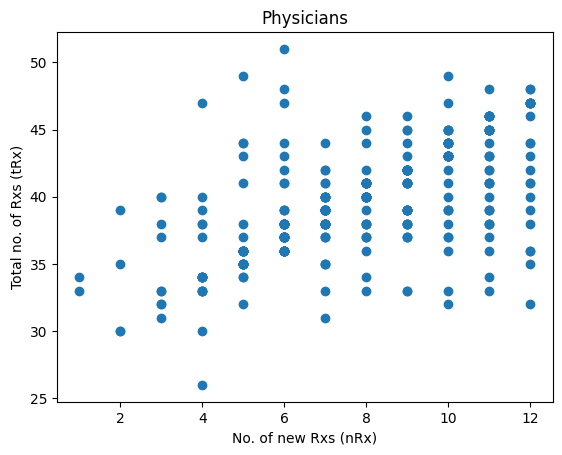

In [6]:
# visualizing the data

plt.title('Physicians')
plt.scatter(x = df['nrx'], y = df['trx'])
plt.xlabel('No. of new Rxs (nRx)')
plt.ylabel('Total no. of Rxs (tRx)')
plt.show()

C:\Users\srira\anaconda3\envs\icr_kaggle\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\srira\anaconda3\envs\icr_kaggle\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\srira\anaconda3\envs\icr_kaggle\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\srira\anaconda3\envs\icr_kaggle\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

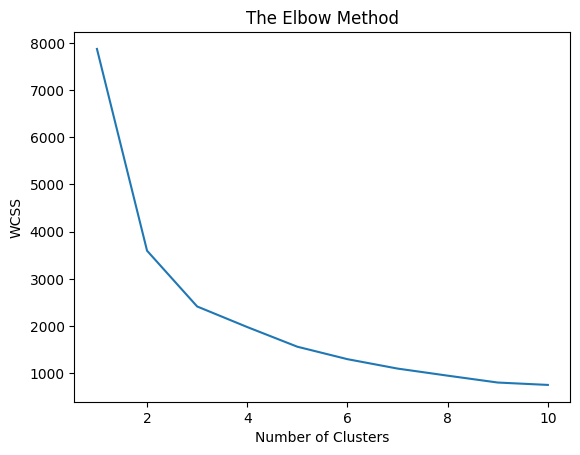

In [7]:
#Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=100)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


From the elbow curve, we consider optimal number of clusters as 3.

In [8]:
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=100)
physicians_clusters=kmeans.fit_predict(df)


C:\Users\srira\anaconda3\envs\icr_kaggle\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
physicians_clusters

array([0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2,
       2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0,
       1, 1, 0, 0, 0, 2, 2, 1, 2, 0, 2, 1, 0, 1, 1, 2, 0, 2, 2, 1, 1, 2,
       2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 1, 1, 0,
       1, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0,
       1, 2, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 1, 2,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 1, 2, 2, 0, 2,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1,

In [10]:
# adding result to the main dataframe
df['cluster'] = physicians_clusters

# check
df

,trx,nrx,cluster
0,40,8,0
1,37,6,2
2,43,10,1
3,42,9,1
4,46,11,1
...,...,...,...
365,42,8,1
366,39,11,0
367,39,6,0
368,35,7,2


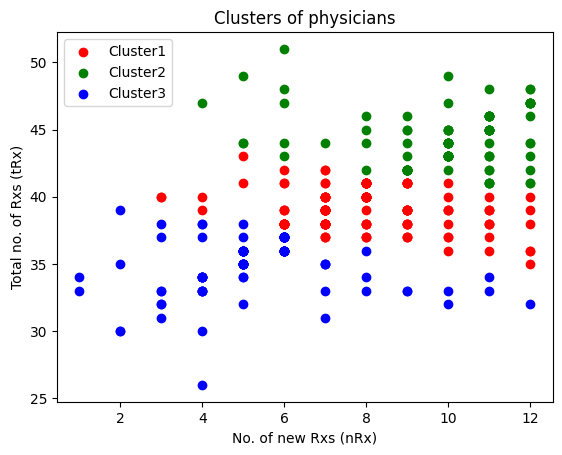

In [11]:
#Visualize the clusters
plt.scatter(x = df[df['cluster'] == 0]['nrx'], y = df[df['cluster'] == 0]['trx'], c = 'red', label='Cluster1')
plt.scatter(x = df[df['cluster'] == 1]['nrx'], y = df[df['cluster'] == 1]['trx'], c = 'green', label='Cluster2')
plt.scatter(x = df[df['cluster'] == 2]['nrx'], y = df[df['cluster'] == 2]['trx'], c = 'blue', label='Cluster3')


plt.title('Clusters of physicians')
plt.xlabel('No. of new Rxs (nRx)')
plt.ylabel('Total no. of Rxs (tRx)')
plt.legend()
plt.show()

In [12]:
# adding the physician ids
df['Phyisican_Id'] = phy_id.values

# check
df

,trx,nrx,cluster,Phyisican_Id
0,40,8,0,55232
1,37,6,2,1173
2,43,10,1,28285
3,42,9,1,26262
4,46,11,1,76343
...,...,...,...,...
365,42,8,1,70334
366,39,11,0,57248
367,39,6,0,55229
368,35,7,2,47189


In [13]:
# value counts
df['cluster'].value_counts()

cluster
0    157
1    110
2    103
Name: count, dtype: int64

In [14]:
df[df['cluster'] == 2]['nrx'].mean()

5.388349514563107

In [15]:
for c in [0,1,2]:
    # computing nrx to trx ratio for each cluster
    print(f'Nrx to Trx ratio for cluster {c+1}: ',round(df[df['cluster']==c]['nrx'].sum()/df[df['cluster']==c]['trx'].sum(),3))

Nrx to Trx ratio for cluster 1:  0.201
Nrx to Trx ratio for cluster 2:  0.223
Nrx to Trx ratio for cluster 3:  0.154


Therefore, cluster 2 is the group pharma company have to target.

In [17]:
# saving the results
df.to_csv('physician_segmented_data.csv')